In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hw = pd.read_csv('D:\PycharmProjects\DescriptiveStatistics\datasets\Person_Gender_Height_Weight_Index.csv')
hw.drop( "Index", inplace=True,axis=1)
rows = hw.shape[0]
cols = hw.shape[1]
print("Rows={0} columns={1}".format( rows, cols ) )

Rows=500 columns=3


In [3]:
height_data = hw[["Height"]].copy()
weight_data = hw[["Weight"]].copy()

In [4]:
counts = [1] * rows
height_data["counts_height"] = counts
weight_data["counts_weight"] = counts

In [5]:
weight_data = weight_data.sort_values("Weight")
height_data = height_data.sort_values("Height")

In [6]:
height_data = height_data.groupby("Height", as_index=False).count()
weight_data = weight_data.groupby("Weight", as_index=False).count()

In [7]:
height_data["cumcounts_height"] = height_data["counts_height"].cumsum()
weight_data["cumcounts_weight"] = weight_data["counts_weight"].cumsum()

In [8]:
q1_height = hw["Height"].quantile( 1/4 )
q2_height = hw["Height"].quantile( 3/4 )
q1_weight = hw["Weight"].quantile( 1/4 )
q2_weight = hw["Weight"].quantile( 3/4 )
iqr_height = q2_height - q1_height
iqr_weight = q2_weight - q1_weight

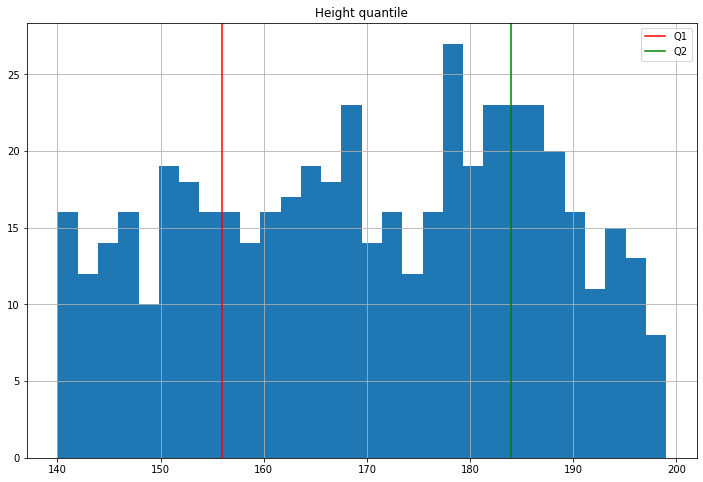

In [9]:
plt.figure( figsize=(12,8) )
hw["Height"].hist( bins=30 )
plt.axvline( q1_height, color="r", label="Q1" )
plt.axvline( q2_height, color="g", label="Q2" )
plt.legend()
plt.title("Height quantile")
plt.show()

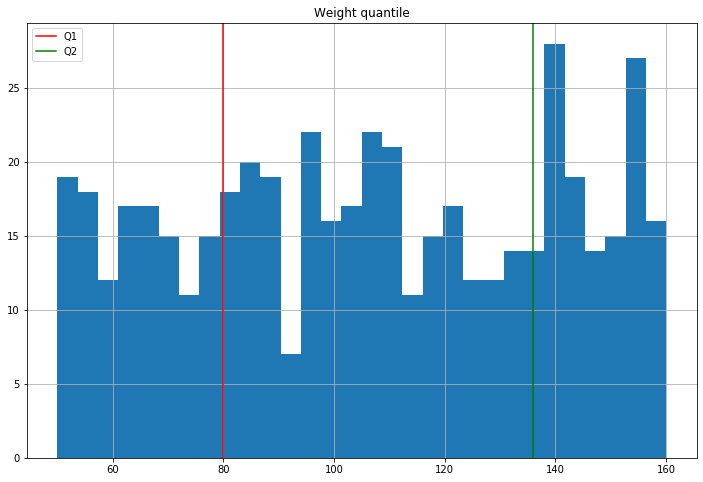

In [10]:
plt.figure( figsize=(12,8) )
hw["Weight"].hist(bins=30)
plt.axvline( q1_weight, color="r", label="Q1" )
plt.axvline( q2_weight, color="g", label="Q2" )
plt.title("Weight quantile" )
plt.legend()
plt.show()

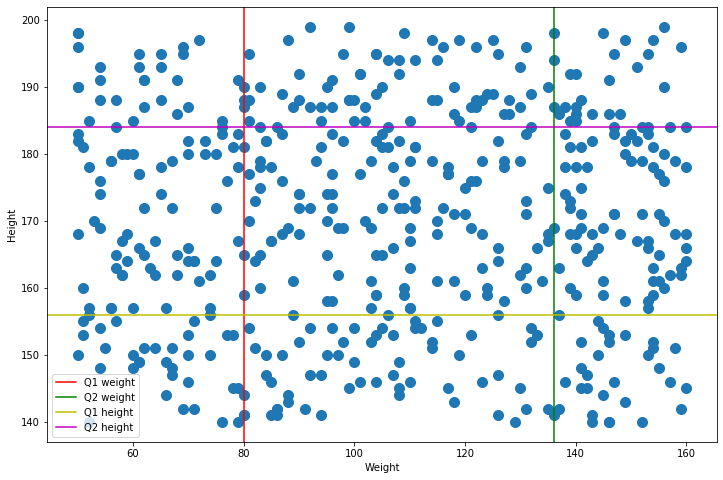

In [11]:
plt.figure( figsize=(12,8) )
plt.scatter( hw["Weight"], hw["Height"], s=100 )
plt.xlabel("Weight")
plt.ylabel("Height")
plt.axvline( q1_weight, color="r", label="Q1 weight" )
plt.axvline( q2_weight, color="g", label="Q2 weight" )
plt.axhline( q1_height, color="y", label="Q1 height" )
plt.axhline( q2_height, color="m", label="Q2 height" )
plt.legend()
plt.show()

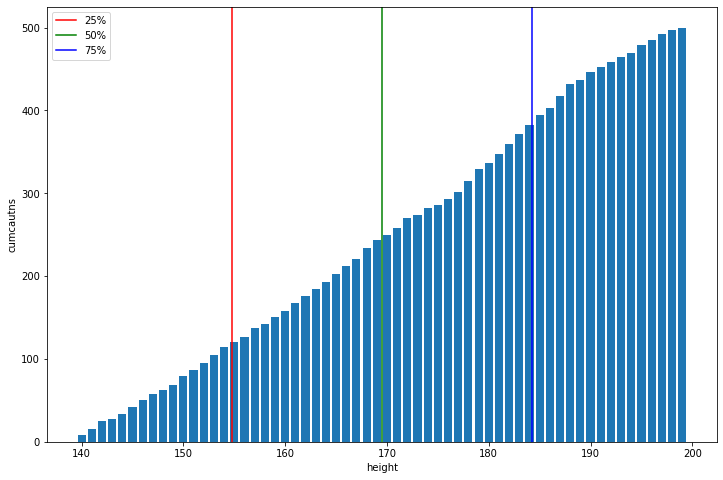

In [12]:
plt.figure(figsize=(12,8))
plt.bar( height_data["Height"], height_data["cumcounts_height"] )
plt.xlabel("height")
plt.ylabel("cumcautns")
plt.axvline( height_data["Height"].quantile(1/4), color="r", label="25%" )
plt.axvline( height_data["Height"].quantile(1/2), color="g", label="50%" )
plt.axvline( height_data["Height"].quantile(3/4), color="b", label="75%" )
plt.legend()


